# Q2

A gusset is attached vertically to a beam to support 1kN load under it. Determine the required rivet diameter if the allowable shear stress is 70MPa.

In [200]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pi, radians, degrees, dist, atan, sqrt, cos, sin, hypot, pow

In [201]:
# Info from question
coorA = [0,0]
coorB = [150,0]
coorC = [75,-120]
loadLocation = [450,0]

PLoad = 1000
shearStress = 70E+6

In [202]:
print('1. Centroid ')


xBar = round((coorA[0]+coorB[0]+coorC[0])/3,0)
yBar = round((coorA[1]+coorB[1]+coorC[1])/3,0)

print(f'Centroid is ({xBar},{yBar})from Bolt A')

1. Centroid 
Centroid is (75.0,-40.0)from Bolt A


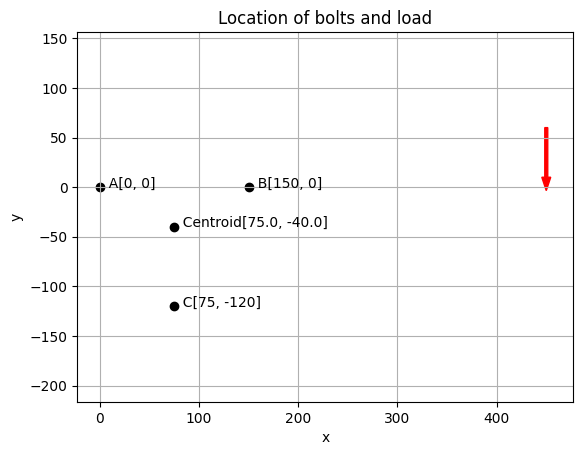

In [203]:
centroid = [xBar,yBar]
data = np.array([coorA,coorB,coorC,centroid])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
# ax.hlines(Fproof,0,10000)
# ax.hlines(Fi,0,10000)

ax.set(xlabel='x', ylabel='y',
       title='Location of bolts and load')

ax.text(coorA[0],coorA[1],f'  A{coorA}')
ax.text(coorB[0],coorB[1],f'  B{coorB}')
ax.text(coorC[0],coorC[1],f'  C{coorC}')
ax.text(centroid[0],centroid[1],f'  Centroid{centroid}')

plt.axis('equal')
plt.show()

In [204]:
print('2. Find distance between bolts and centroid')
Centroid = [xBar, yBar]
rA = dist(coorA, Centroid)
rB = dist(coorB, Centroid)
rC = dist(coorC, Centroid)
print(f'rA = {rA}')
print(f'rB = {rB}')
print(f'rC = {rC}')

2. Find distance between bolts and centroid
rA = 85.0
rB = 85.0
rC = 80.0


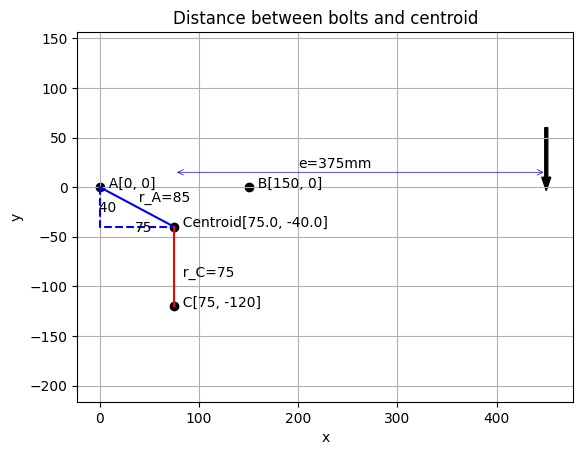

In [205]:
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='k')


ax.set(xlabel='x', ylabel='y',
       title='Distance between bolts and centroid')

ax.text(coorA[0],coorA[1],f'  A{coorA}')
ax.text(coorB[0],coorB[1],f'  B{coorB}')
ax.text(coorC[0],coorC[1],f'  C{coorC}')
ax.text(centroid[0],centroid[1],f'  Centroid{centroid}')

triangle_coords = np.array([coorA, [0,-40], centroid])
ax.plot(triangle_coords[:, 0], triangle_coords[:, 1], 'b--')
ax.plot([centroid[0],coorA[0]], [centroid[1],coorA[1]], 'b-')
ax.plot([centroid[0],coorC[0]], [centroid[1],coorC[1]], 'r-')

ax.text(coorA[0]-10,coorA[1]-25,f'  40')
ax.text(coorA[0]+30,coorA[1]-15,f'  r_A=85')
ax.text(centroid[0]-40,centroid[1]-5,f'75')
ax.text(coorC[0],coorC[1]+30,f'  r_C=75')
ax.text(coorB[0]+50,coorB[1]+20,f'e=375mm')

ax.annotate("",
            xy=(450, 15),  # End point of the arrow
            xytext=(75, 15),  # Start point of the arrow
            arrowprops=dict(arrowstyle="<->",  # Double-headed arrow style
                            color="blue",
                            linewidth=0.5))

plt.axis('equal')
plt.show()

In [206]:
print('3. Find Tangential Force at A')
DirectShear = PLoad/3
CentroidToLoad = 375
Fta = (PLoad*CentroidToLoad*rA)/(pow(rA,2)+pow(rB,2)+pow(rC,2))
print(f'Tangential Force at A, Fta = {Fta:.1f}N')
Ftb=Fta
print(f'Tangential Force at B, Ftb = {Ftb:.1f}N')
print(f'Direct Shear at A, Fsa = {DirectShear:.1f}N')

3. Find Tangential Force at A
Tangential Force at A, Fta = 1528.8N
Tangential Force at B, Ftb = 1528.8N
Direct Shear at A, Fsa = 333.3N


In [207]:
Ftc = (PLoad*CentroidToLoad*rC)/(pow(rA,2)+pow(rB,2)+pow(rC,2))
print(f'Tangential Force at C, Ftc = {Ftc:.1f}N')

Tangential Force at C, Ftc = 1438.8N


4. Find resultant forces in  each bolt


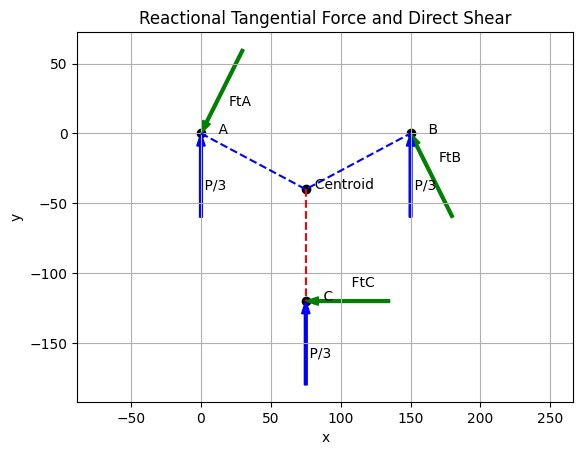

In [208]:
print('4. Find resultant forces in  each bolt')

fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
# ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
ax.arrow(coorA[0]+30,coorA[1]+60, -30,-60,width=2,color='g', length_includes_head='False')
ax.arrow(coorB[0]+30,coorB[1]-60, -30,60,width=2,color='g', length_includes_head='False')
ax.arrow(coorC[0]+60,coorC[1], -60,0,width=2,color='g', length_includes_head='False')
# ax.arrow(coorD[0]-75,coorD[1]+60, 75,-60,width=3,color='g', length_includes_head='False')

# Direct Shear
for i in [coorA,coorB,coorC]:
       ax.arrow(i[0],i[1]-60, 0,60,width=2,color='b', length_includes_head='False')
       # ax.text(i[0],i[1],f'    {i}')

ax.set(xlabel='x', ylabel='y',
       title='Reactional Tangential Force and Direct Shear')

coorBolts = [coorA,coorB,coorC]
boltLabel = ['A','B','C','D']
for i in range(3):
       ax.text(coorBolts[i][0],coorBolts[i][1],f'    {boltLabel[i]}')
       ax.text(coorBolts[i][0]-10,coorBolts[i][1]-40,f'    P/3')


ax.plot([coorA[0],centroid[0],coorB[0]], [coorA[1],centroid[1],coorB[1]], 'b--')
ax.plot([centroid[0],coorC[0]], [centroid[1],coorC[1]], 'r--')

ax.text(centroid[0],centroid[1],f'  Centroid')
ax.text(coorBolts[0][0]+20,coorBolts[0][1]+20,f'FtA')
ax.text(coorBolts[1][0]+20,coorBolts[1][1]-20,f'FtB')
ax.text(coorBolts[2][0]+20,coorBolts[2][1]+10,f'    FtC')

plt.axis('equal')
plt.show()

In [209]:
tangential_angle=round(degrees(atan(75/40)),2)
print(f'Angle of Tangential Force, θ = {tangential_angle}°')

Angle of Tangential Force, θ = 61.93°


In [210]:
F_ax=round(Fta*cos(radians(tangential_angle)),0)
F_ay=round(-Fta*sin(radians(tangential_angle)),0)+DirectShear
print(f'F_ax= {F_ax}N')
print(f'F_ay= {F_ay}N')
F_A = round(hypot(F_ax,F_ay),0)
print(f'F_A= {F_A}N')

F_ax= 719.0N
F_ay= -1015.6666666666667N
F_A= 1244.0N


In [211]:
F_bx=round(-Ftb*cos(radians(tangential_angle)),0)
F_by=round(Ftb*sin(radians(tangential_angle)),0)+DirectShear
print(f'F_bx= {F_bx}N')
print(f'F_by= {F_by}N')
F_B = round(hypot(F_bx,F_by),0)
print(f'F_B= {F_B}N')

F_bx= -719.0N
F_by= 1682.3333333333333N
F_B= 1830.0N


In [212]:
F_cx=round(-Ftc,0)
F_cy=round(DirectShear,0)
print(f'F_cx= {F_cx}N')
print(f'F_cy= {F_cy}N')
F_C = round(hypot(F_cx,F_cy),0)
print(f'F_C= {F_C}N')

F_cx= -1439.0N
F_cy= 333.0N
F_C= 1477.0N


In [219]:
print('5. Find rivet diameter')

rivetDiameter = round(sqrt(F_B*4/(shearStress*pi)),5)
print(f'Rivet diameter = {rivetDiameter}m')
print(f'Rivet diameter in mm= {rivetDiameter*1000}m')

5. Find rivet diameter
Rivet diameter = 0.00577m
Rivet diameter in mm= 5.77m
